In [1]:
import sys
import os 

sys.path.append(os.path.abspath('../src'))  

In [2]:
import pandas as pd
import numpy as np
import metrics as M
import matplotlib.pyplot as plt
import viz as v
from scipy import stats 
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression



In [3]:
np.random.seed(42)

In [4]:
df = pd.read_csv("../data/health_study_dataset.csv")

In [5]:
statistics = M.statistik(df)
print("Statistics:")
statistics

Statistics:


,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


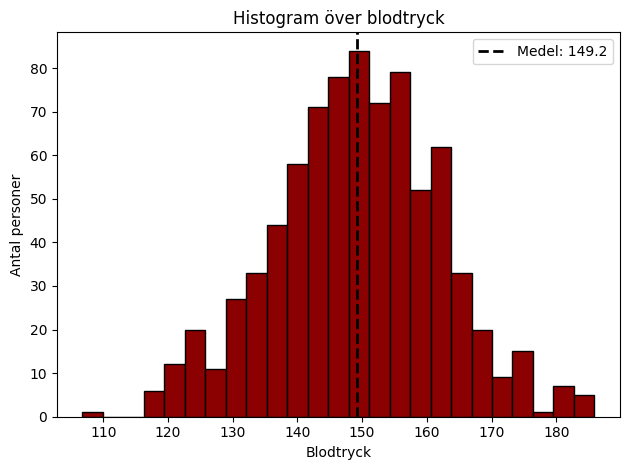

In [6]:
v.hist_blodtryck(df)

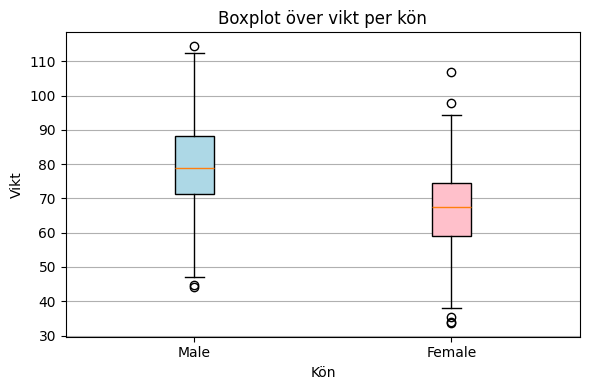

In [7]:
v.box_sex_weight(df)

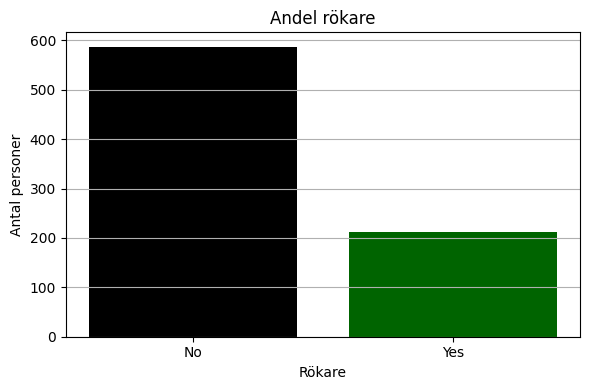

In [8]:
v.bar_smokers(df)

In [9]:
counts = M.sick_ones(df)
print(f"Andelen personer som har en sjukdom:" , counts) 

Andelen personer som har en sjukdom: 47


In [10]:
simulated_disease, sim_dis, disease_count,people_quantity = M.disease_sim(df)
print(f"Verklig andel sjuka i datasetet: {disease_count:.3f}")
print(f"Simulerad andel sjuka: {simulated_disease:.3f}")
print(f"Skillnaden: {simulated_disease - disease_count:.3f}")


Verklig andel sjuka i datasetet: 0.059
Simulerad andel sjuka: 0.056
Skillnaden: -0.003


In [11]:
lo, hi, mean_normal = M.ci_systolic_bp(df)
blo, bhi, bmean = M.ci_systolic_bp_bootstrap(df, B=3000)
true_mean = M.true_mean(df)
print(f"95% CI med normalapproximation: [{lo:.2f} , {hi:.2f}, {mean_normal:.2f}]")
print(f"95% CI med bootstrapmetoden: [{blo:.2f}, {bhi:.2f}, {bmean:.2f}]")
print(f"True mean: {true_mean:.2f}")


95% CI med normalapproximation: [148.29 , 150.07, 149.18]
95% CI med bootstrapmetoden: [148.34, 150.09, 149.18]
True mean: 149.18


In [12]:
lo, hi, mean_normal = M.ci_systolic_bp(df)
blo, bhi, bmean = M.ci_systolic_bp_bootstrap(df, B=3000)
blo = 148.34
lo =  148.29
bhi =  150.09
hi =  150.07
skillnad_low = (blo - lo)
skillnad_high = (bhi - hi) 
print(f"Skillanden mellan metoderna: Low: {skillnad_low:.2f}")
print(f"Skillanden mellan metoderna: High: {skillnad_high:.2f}")


Skillanden mellan metoderna: Low: 0.05
Skillanden mellan metoderna: High: 0.02


In [13]:
rokare, ickerokare, t_stat, p_value, t_stat_w, p_value_w = M.hypotesprövning(df)
print(f"Standard t-test: t = {t_stat:.3f}, p = {p_value:.3f}")
print(f"Welch    t-test: t = {t_stat_w:.3f}, p = {p_value_w:.3f}")


Standard t-test: t = 0.461, p = 0.645
Welch    t-test: t = 0.450, p = 0.653


## Resultat - Hypotesprövning ”Rökare har högre medel-blodtryck än icke-rökare.”: 
 I denna hypotesprövningen visade t-testet att det finns inte signikant skillnad i systolisk blodtryck mellan båda grupperna (rökare och ickerökare). 

Standard t-test: t = 0.461, p = 0.6450

Welch    t-test: t = 0.450, p = 0.6527

Hypotesen stöds inte av datan, då p-värdena är större än 0,05 och det finns ingen signifikant skillnad mellan grupperna.

In [14]:
power = M.power_simulation(rokare, ickerokare)

print("Power:", power)

Power: 0.068


## Metodval - motivering del1: 
- Konfidensintervall: normalapproximation eller bootstrap: 
Jag valde normalapproximation över bootstrap eftersom normalapproximation fungerar bra när urvalet är relativt stort, som i mitt fall. Bootstrap är mer flexibel och kan användas även för små urval eller när fördelningen är okänd, men är mer komplex att implementera.

- Hypotesprövning: bootstrap eller t-test funktion: 
Jag valde T-test funktion, eftersom den är snabb och enkel att använda. Eftersom mitt urval är ungefär normalfördelad, då är t-test det mest lämpliga alternativet för att den är enklast och mest effektiv.

Källor: 
- https://www.ne.se/uppslagsverk/encyklopedi/l%C3%A5ng/normalapproximation#:~:text=normalapproximation%2C%20inom%20statistiken%20metod%20att,ungef%C3%A4r%20normalf%C3%B6rdelade%20i%20enlighet%20med 

- https://sv.wikipedia.org/wiki/T-test

- https://science.nu/amne/val-av-statistisk-test-analys/#:~:text=One%2Dsample%20t%2Dtest&text=Testet%20anv%C3%A4nds%20om%20man%20vill,allts%C3%A5%20%C3%A4r%20ett%20hypotetiskt%20v%C3%A4rde).

,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


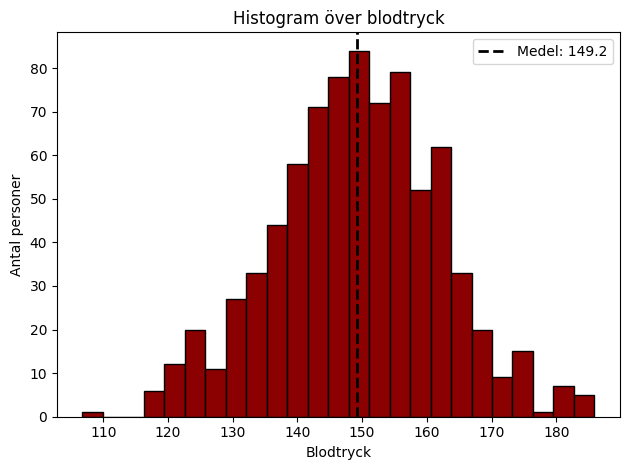

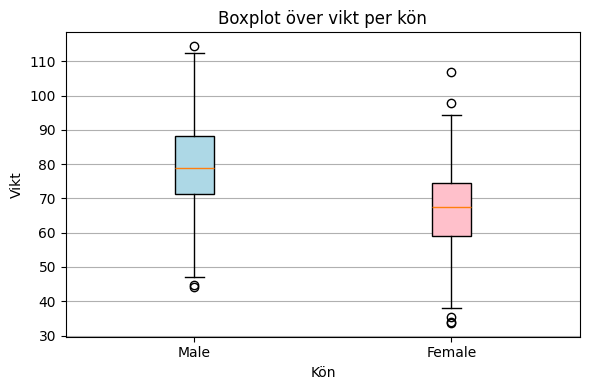

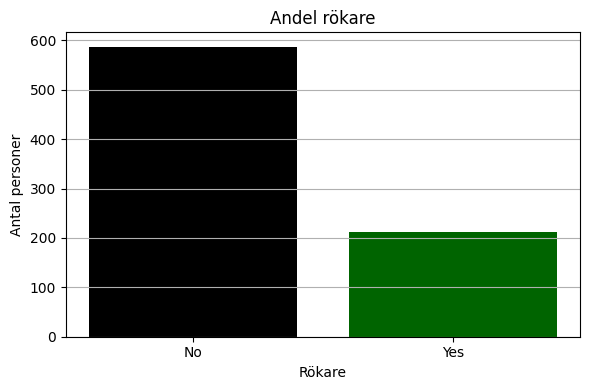

In [15]:
analyzer = M.HealthAnalyzer(df)   
resultat = analyzer.statistik()
display(resultat)
analyzer.hist_blodtryck()
analyzer.box_sex_weight()
analyzer.bar_smokers()


## Healthanalyzer klass som visar statistik för olika kategorier samt 3 olika visualiseringar för:

-  En histogram över blodtryck
- En boxplot över vikt grupperat per kön
- En bar som visar andel rökare

In [16]:
coef_age, coef_weight, intercept, r2, prediction, prediction1, prediction2, prediction3, prediction4, prediction5 = M.linreg(df)


print(f"""
    intercept = {intercept:.2f}
    koefficient age = {coef_age:.3f}
    koefficient weight = {coef_weight:.3f}
    R² = {r2:.3f}
    
    Prognos för (50 år, 80kg):
    Systolisk blodtryck: 
    {prediction:.1f}

    Prognos för (20 år, 80kg):
    Systolisk blodtryck: 
    {prediction1:.1f}

    Prognos för (15 år, 80kg):
    Systolisk blodtryck: 
    {prediction2:.1f}

    Prognos för (25 år, 40kg):
    Systolisk blodtryck: 
    {prediction3:.1f}

    Prognos för (25 år, 70kg):
    Systolisk blodtryck: 
    {prediction4:.1f}

    Prognos för (25 år, 100kg):
    Systolisk blodtryck: 
    {prediction5:.1f}
      """)



    intercept = 109.50
    koefficient age = 0.539
    koefficient weight = 0.178
    R² = 0.405

    Prognos för (50 år, 80kg):
    Systolisk blodtryck: 
    150.7

    Prognos för (20 år, 80kg):
    Systolisk blodtryck: 
    134.5

    Prognos för (15 år, 80kg):
    Systolisk blodtryck: 
    131.8

    Prognos för (25 år, 40kg):
    Systolisk blodtryck: 
    130.1

    Prognos för (25 år, 70kg):
    Systolisk blodtryck: 
    135.4

    Prognos för (25 år, 100kg):
    Systolisk blodtryck: 
    140.7
      


## Linjär Regression för att förutsäga systolisk blodtryck 

- Jag har använt mig av LinearRegression metoden, eftersom den var byggd för just detta problem. Jag behövde undersöka två variabler som påverkas en tredje variabel. Metoden är enkel att använda och ger tydliga resultat. Modellen gör det möjligt att förutsäga blodtryck för individer som var meningen med denna analysen.


Mina variabler: 

X = oberoende variabler - age och weight 

y = beroende variabeln  - systolisk blodtryck 

Mina parametrar: 


- intercept - modellens konstantled


- coef_age - hur mycket blodtrycket förändras när ålder ökar med 1 år.


- coef_weight - hur mycker blodtrycker förändras när vikten ökar med 1 kg. 


- r2 - modellens förklaringsgrad 




Mina prognoser visar hur blodtrycket påverkas av ålder eller vikten när den andra hålls konstant.
Systolisk blodtryck ökar med åldern, och tyngre personer har högre blodtryck än de som är lättare.
 


In [17]:
scaler, X_scaled, pca ,X_pca, X = M.run_pca(df)

print("Huvudkomponenter (vectors)(PC1, PC2):")
print(pca.components_)

print("\nFörklarad varians(PC1, PC2):")
print(pca.explained_variance_ratio_)


print("\nTransformerad data (X i PCA-rum):")
print(X_pca)

Huvudkomponenter (vectors)(PC1, PC2):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Förklarad varians(PC1, PC2):
[0.50865453 0.49134547]

Transformerad data (X i PCA-rum):
[[ 0.76315363 -0.02406573]
 [-1.28101319  1.04424646]
 [ 0.01282122  0.9214376 ]
 ...
 [ 1.741939   -0.71009472]
 [ 0.96447876 -0.9084891 ]
 [-0.2815469   0.33753655]]


## PCA 
Jag genomförde en PCA på min data med hjälp av sklearn.decomposition metoden. Jag standeriserade datan, och sen räknade korrelationsmatrisen. Sedan räknade jag mina värdena. Jag gjorde det för att förstå mönster i min data och för att riktningar i  datan kan variera.  
(PC1) går genom den riktning som har mest variation
(PC2) går i en vinkelrät riktning som fångar resten av variationen. 

Förklaring av rubrikerna: 


- Huvudkomponenter (vectors) - detta är vektorerna som definierar mina PCA - komponenter.


- Förklarad varians - förklararingsgraden.
[0.50865453 0.49134547]


- Transformerad data (X i PCA-rum) - observation av de nya kooridnaterna i varje rad. 



Tolkning:

- Variansen är nästan jämntfördelad. Variablerna korrelerar. 








En tabel som visar antal sjuka av alla personer i datasetet och procentantal i (%), samt medelåldern för de som har en sjukdom:


,Antal sjuka,Totalt,Procent sjuka (%),Medelålder
sex,,,,
F,18,403,4.5,49.9
M,29,397,7.3,51.2


Prognoser för systolisk blodtryck för olika individer:


,Prognos för en person som är 50 år och 80kg,Prognos för en person som är 20 år och 80kg,Prognos för en person som är 15 år och 80kg,Prognos för en person som är 25 år och 40kg,Prognos för en person som är 25 år och 70kg,Prognos för en person som är 25 år och 100kg
0,150.658065,134.490236,131.795598,130.078573,135.408299,140.738024


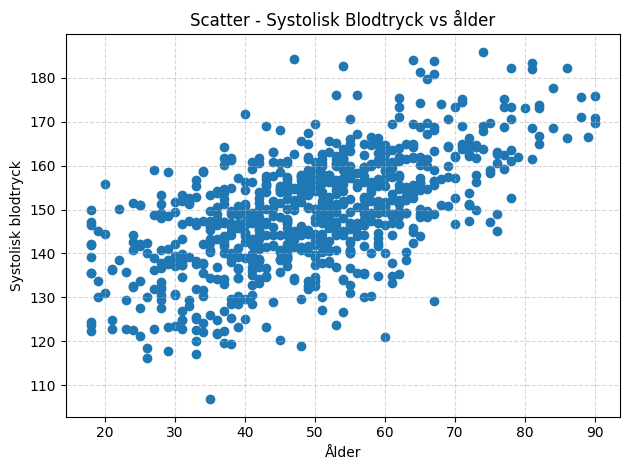

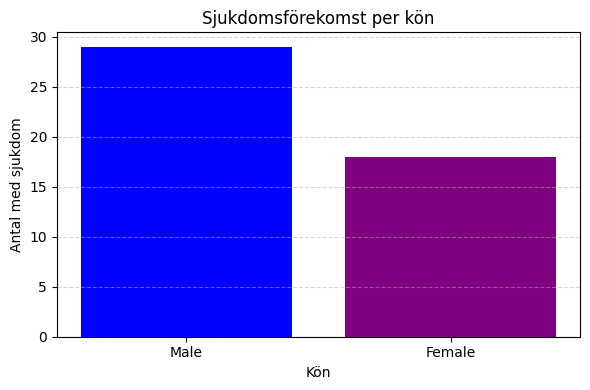

In [18]:
advanced = M.advanced_class(df) 
table = advanced.disease_tabel
predictions = advanced.linreg
resultat2 = advanced.linreg()
resultat1 = advanced.disease_tabel()
print("En tabel som visar antal sjuka av alla personer i datasetet och procentantal i (%), samt medelåldern för de som har en sjukdom:")
display(resultat1)
print("Prognoser för systolisk blodtryck för olika individer:")
display(resultat2)
advanced.scatter_blodtryck_age()
advanced.disease_gender()
  



## En klass "advanced_class" som hanterar flera grafer och analyser

I klassen finns:
- En tabell som visar antal sjuka av alla personer i datasetet och procentantal i (%), samt medelåldern för de som har en sjukdom
- En tabell med prognoser för systolisk blodtryck för olika individer
- En scatter som visar "Systolisk blodtryck vs age"
- En bar som visar sjukdomsförekomst per kön

## Metodval och mina källor: 


LinearRegression - 

Jag använde mig av denna matoden , eftersom den är nogrann och är lätt och tydlig och förstå. 

Linjär regression ger nogranna resultat och är lätt att tolka.

Enkel, stabil och nogrann metod

PCA - 

Jag använde mig av PCA eftersom, metoden förenklar datan utan att förlöra mycket information och gör det lättare att visualisera. PCA ger bättre förståelse av samband mellan variablerna och hur datan kan gruppera sig. 

StandardScaler - 

Jag använde mig av StandardScaler för att normalisera variablerna. Utan det hade PCA trott att variabler med störst värden är viktigast vilket ger dålig resultat
Om datan inte är skalad blir PCA felaktig. Inte så komplicerat att använda. 


Källor:
- https://www.datacamp.com/tutorial/sklearn-linear-regression?utm_cid=19589720821&utm_aid=157156375191&utm_campaign=230119_1-ps-other%7Edsa%7Etofu_2-b2c_3-emea_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&utm_loc=1012427-&utm_mtd=-c&utm_kw=&utm_source=google&utm_medium=paid_search&utm_content=ps-other%7Eemea-en%7Edsa%7Etofu%7Etutorial%7Epython&gad_source=1&gad_campaignid=19589720821&gbraid=0AAAAADQ9WsHVRWIM6e8NB7rZyoHFnviHW&gclid=Cj0KCQiA0KrJBhCOARIsAGIy9wDEh5-UzcgKSwTZPYdys0ho-SOHl-bZgtMCeDR5erJ7Q6SXknwaN7gaAtzFEALw_wcB&dc_referrer=https%3A%2F%2Fwww.google.com%2F

- https://www.geeksforgeeks.org/machine-learning/implementing-pca-in-python-with-scikit-learn/

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html



